# PyTorch Dataset

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/iris.csv')

In [3]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

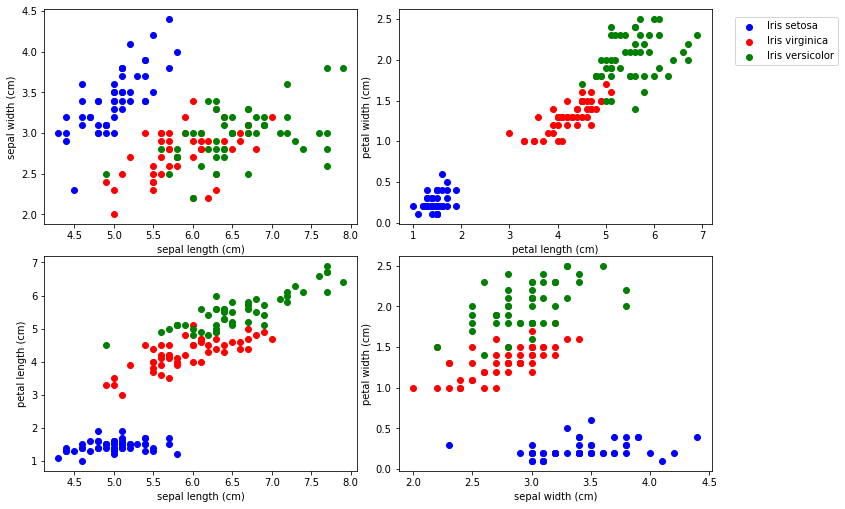

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
features = df.drop('target', axis=1).values

In [7]:
label = df['target'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=33)

In [9]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

## Dataset and DataLoaders

In [10]:
from torch.utils.data import TensorDataset, DataLoader

In [11]:
data = df.drop('target', axis=1).values
labels = df['target'].values

In [12]:
iris = TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))

In [13]:
len(iris)

150

In [14]:
iris_loader = DataLoader(iris, batch_size=10, shuffle=True)

In [15]:
for batch in iris_loader:
    print(batch)

[tensor([[6.3000, 2.3000, 4.4000, 1.3000],
        [6.7000, 3.0000, 5.0000, 1.7000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [6.4000, 2.9000, 4.3000, 1.3000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [4.6000, 3.4000, 1.4000, 0.3000]]), tensor([1, 1, 0, 2, 1, 1, 1, 2, 2, 0])]
[tensor([[6.5000, 3.2000, 5.1000, 2.0000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [6.2000, 3.4000, 5.4000, 2.3000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [5.6000, 2.7000, 4.2000, 1.3000],
        [5.7000, 2.6000, 3.5000, 1.0000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [4.4000, 3.0000, 1.3000, 0.2000]]), tensor([2, 0, 2, 1, 1, 1, 1, 0, 0, 0])]
[tensor([[6.0000, 2.2000, 4.0000, 1.0000],
        [4.7000, 3.2000, 1.3000